19.	A social network dataset is a categorical dataset to determine whether a user purchased a particular product based on gender, age and estimated salary.

Objectives:

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to classify whether a user purchased a car or not? (Use Linear Kernel)

iii.	Create a confusion matrix and evaluate the model using accuracy


Cleaned Dataset:
   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

--- SVM with Linear Kernel ---
Accuracy: 85.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89        73
           1       0.97      0.64      0.77        47

    accuracy                           0.85       120
   macro avg       0.89      0.81      0.83       120
weighted avg       0.87      0.85      0.84       120


Predictions on Test Set:
     Gender       Age  EstimatedSalary  Actual Purchased  Predicted Purchased
209  Female  0.827784        -1.433827                 0                    0
280  Female  2.105076         0.513775                 1                    1
33   Female -0.940775        -0.784626                 0        

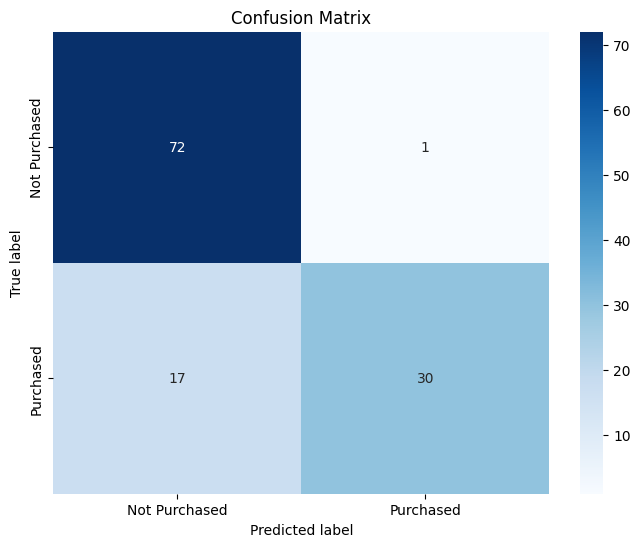

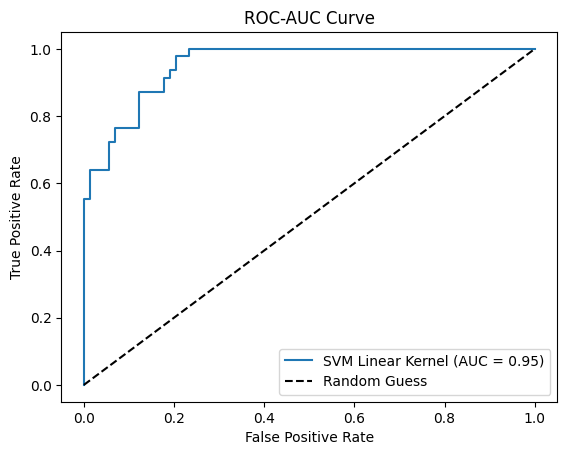

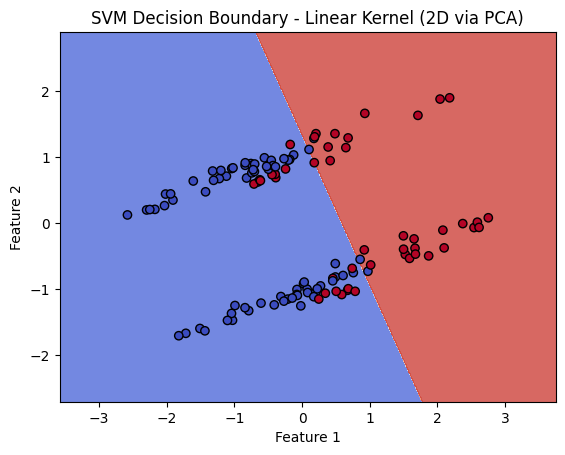

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'Social_Network_Ads.csv'  # Replace with actual path
df = pd.read_csv(file_path)

# Step 1: Drop the 'User ID' column
df_clean = df.drop(columns=['User ID'])

# Step 2: Convert 'Gender' column to numerical (Male = 1, Female = 0)
le = LabelEncoder()
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])

# Step 3: Display the cleaned dataset
print("Cleaned Dataset:")
print(df_clean.head())  # Display first few rows of the cleaned dataset

# Step 4: Split data into features (Gender, Age, EstimatedSalary) and target (Purchased)
X = df_clean[['Gender', 'Age', 'EstimatedSalary']]
y = df_clean['Purchased']

# Step 5: Split the dataset into training and testing sets, keeping track of the indices
X_train, X_test, y_train, y_test, train_index, test_index = train_test_split(X, y, df_clean.index, test_size=0.3, random_state=42)

# Step 6: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train SVM with linear kernel
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    # print(f"Specificity: {specificity:.2f}")
    print("\nClassification Report:\n", class_report)

    return accuracy

# Step 8: Evaluate linear SVM
accuracy_linear = classification_metrics(y_test, y_pred, "SVM with Linear Kernel")

# Step 9: Output predictions for each user in the test set
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'Gender': df_clean.iloc[test_index]['Gender'].map({1: 'Male', 0: 'Female'}),  # Retrieve original Gender
    'Age': X_test[:, 1],  # Standardized Age
    'EstimatedSalary': X_test[:, 2],  # Standardized EstimatedSalary
    'Actual Purchased': y_test,
    'Predicted Purchased': y_pred
})

# Output the results with whether they purchased a car
print(test_results.head())  # Display first few rows of the prediction results

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['Not Purchased', 'Purchased'])

# Plot ROC-AUC curve
def plot_roc_auc(svm_model, X_test, y_test, model_name):
    y_prob = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend()
    plt.show()

# Plot the ROC curve for the linear kernel SVM
plot_roc_auc(svm_linear, X_test, y_test, "SVM Linear Kernel")

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_linear_2d = SVC(kernel='linear', random_state=42)
svm_linear_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_linear_2d, X_test_2d, y_test, "Linear Kernel (2D via PCA)")

20.	A social network dataset is a categorical dataset to determine whether a user purchased a particular product based on gender, age and estimated salary.

Objectives:

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to classify whether a user purchased a car or not? (Use Linear Kernel)

iii.	Create a confusion matrix and evaluate the model using Recall.



Cleaned Dataset:
   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

--- SVM with Linear Kernel ---
Recall: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89        73
           1       0.97      0.64      0.77        47

    accuracy                           0.85       120
   macro avg       0.89      0.81      0.83       120
weighted avg       0.87      0.85      0.84       120


Predictions on Test Set:
     Gender       Age  EstimatedSalary  Actual Purchased  Predicted Purchased
209  Female  0.827784        -1.433827                 0                    0
280  Female  2.105076         0.513775                 1                    1
33   Female -0.940775        -0.784626                 0            

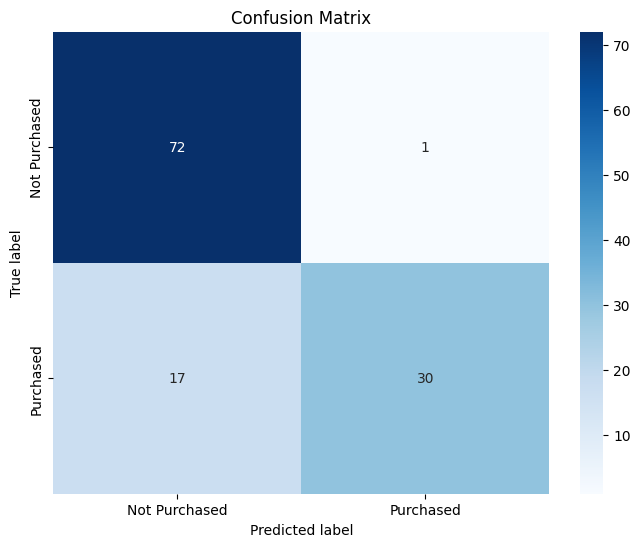

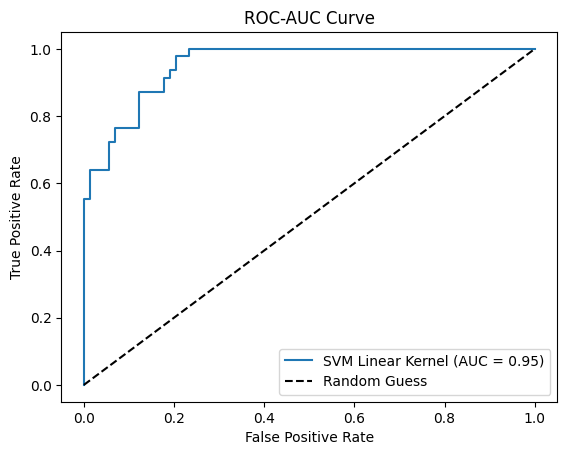

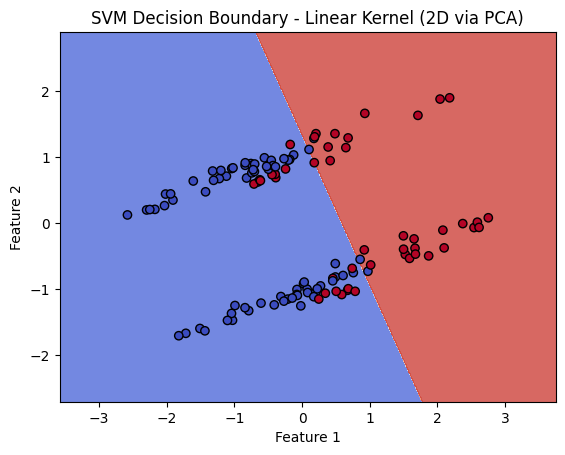

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import recall_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'Social_Network_Ads.csv'  # Replace with actual path
df = pd.read_csv(file_path)

# Step 1: Drop the 'User ID' column
df_clean = df.drop(columns=['User ID'])

# Step 2: Convert 'Gender' column to numerical (Male = 1, Female = 0)
le = LabelEncoder()
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])

# Step 3: Display the cleaned dataset
print("Cleaned Dataset:")
print(df_clean.head())  # Display first few rows of the cleaned dataset

# Step 4: Split data into features (Gender, Age, EstimatedSalary) and target (Purchased)
X = df_clean[['Gender', 'Age', 'EstimatedSalary']]
y = df_clean['Purchased']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train SVM with linear kernel
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # Recall
    recall = recall_score(y_true, y_pred)

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Recall: {recall:.2f}")
    print("\nClassification Report:\n", class_report)

    return recall

# Step 8: Evaluate linear SVM using recall
recall_linear = classification_metrics(y_test, y_pred, "SVM with Linear Kernel")

# Step 9: Output predictions for each user in the test set
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'Gender': df_clean.iloc[y_test.index]['Gender'].map({1: 'Male', 0: 'Female'}),  # Retrieve original Gender
    'Age': X_test[:, 1],  # Standardized Age
    'EstimatedSalary': X_test[:, 2],  # Standardized EstimatedSalary
    'Actual Purchased': y_test,
    'Predicted Purchased': y_pred
})

print(test_results.head())  # Display first few rows of the prediction results

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['Not Purchased', 'Purchased'])

# Optional: Plot ROC-AUC curve
def plot_roc_auc(svm_model, X_test, y_test, model_name):
    y_prob = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend()
    plt.show()

# Plot ROC curve for the linear kernel SVM
plot_roc_auc(svm_linear, X_test, y_test, "SVM Linear Kernel")

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_linear_2d = SVC(kernel='linear', random_state=42)
svm_linear_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_linear_2d, X_test_2d, y_test, "Linear Kernel (2D via PCA)")

21.	A social network dataset is a categorical dataset to determine whether a user purchased a particular product based on gender, age and estimated salary.

Objectives:

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to classify whether a user purchased a car or not? (Use Linear Kernel)

iii.	Create a confusion matrix and evaluate the model using Precision



Cleaned Dataset:
   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

--- SVM with Linear Kernel ---
Precision: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89        73
           1       0.97      0.64      0.77        47

    accuracy                           0.85       120
   macro avg       0.89      0.81      0.83       120
weighted avg       0.87      0.85      0.84       120


Predictions on Test Set:
     Gender       Age  EstimatedSalary  Actual Purchased  Predicted Purchased
209  Female  0.827784        -1.433827                 0                    0
280  Female  2.105076         0.513775                 1                    1
33   Female -0.940775        -0.784626                 0         

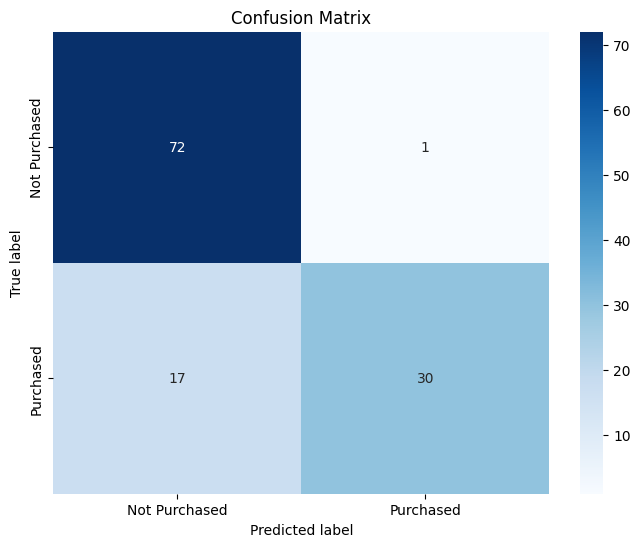

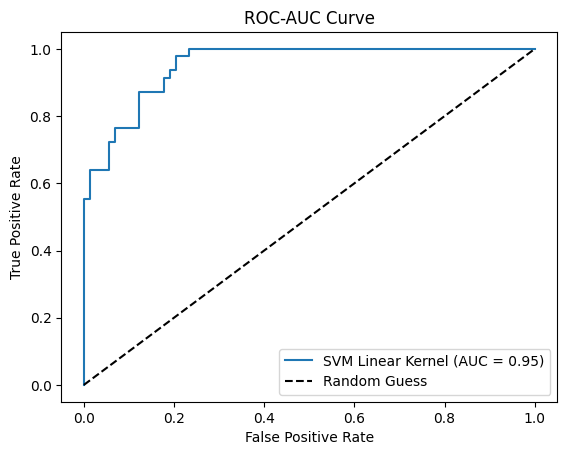

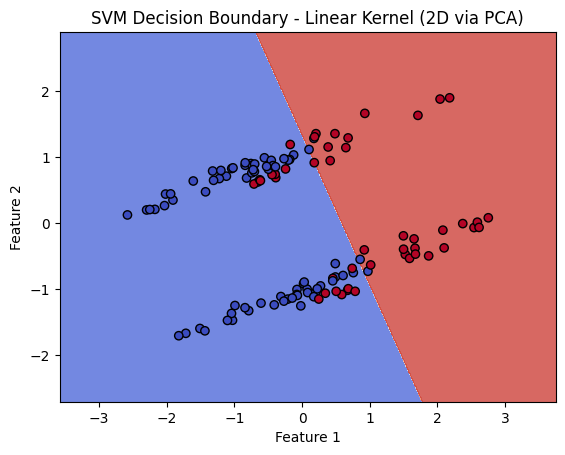

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import precision_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'Social_Network_Ads.csv'  # Replace with actual path
df = pd.read_csv(file_path)

# Step 1: Drop the 'User ID' column
df_clean = df.drop(columns=['User ID'])

# Step 2: Convert 'Gender' column to numerical (Male = 1, Female = 0)
le = LabelEncoder()
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])

# Step 3: Display the cleaned dataset
print("Cleaned Dataset:")
print(df_clean.head())  # Display first few rows of the cleaned dataset

# Step 4: Split data into features (Gender, Age, EstimatedSalary) and target (Purchased)
X = df_clean[['Gender', 'Age', 'EstimatedSalary']]
y = df_clean['Purchased']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train SVM with linear kernel
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # Precision
    precision = precision_score(y_true, y_pred)

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Precision: {precision:.2f}")
    print("\nClassification Report:\n", class_report)

    return precision

# Step 8: Evaluate linear SVM using precision
precision_linear = classification_metrics(y_test, y_pred, "SVM with Linear Kernel")

# Step 9: Output predictions for each user in the test set
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'Gender': df_clean.iloc[y_test.index]['Gender'].map({1: 'Male', 0: 'Female'}),  # Retrieve original Gender
    'Age': X_test[:, 1],  # Standardized Age
    'EstimatedSalary': X_test[:, 2],  # Standardized EstimatedSalary
    'Actual Purchased': y_test,
    'Predicted Purchased': y_pred
})

print(test_results.head())  # Display first few rows of the prediction results

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['Not Purchased', 'Purchased'])

# Optional: Plot ROC-AUC curve
def plot_roc_auc(svm_model, X_test, y_test, model_name):
    y_prob = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend()
    plt.show()

# Plot ROC curve for the linear kernel SVM
plot_roc_auc(svm_linear, X_test, y_test, "SVM Linear Kernel")

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_linear_2d = SVC(kernel='linear', random_state=42)
svm_linear_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_linear_2d, X_test_2d, y_test, "Linear Kernel (2D via PCA)")

22.	A social network dataset is a categorical dataset to determine whether a user purchased a particular product based on gender, age and estimated salary.

Objectives:

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to classify whether a user purchased a car or not? (Use RBF Kernel)

iii.	Create a confusion matrix and evaluate the model using F1-Measure


Cleaned Dataset:
   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

--- SVM with RBF Kernel ---
F1-Score: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.90      0.94      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120


Predictions on Test Set:
     Gender       Age  EstimatedSalary  Actual Purchased  Predicted Purchased
209  Female  0.827784        -1.433827                 0                    1
280  Female  2.105076         0.513775                 1                    1
33   Female -0.940775        -0.784626                 0             

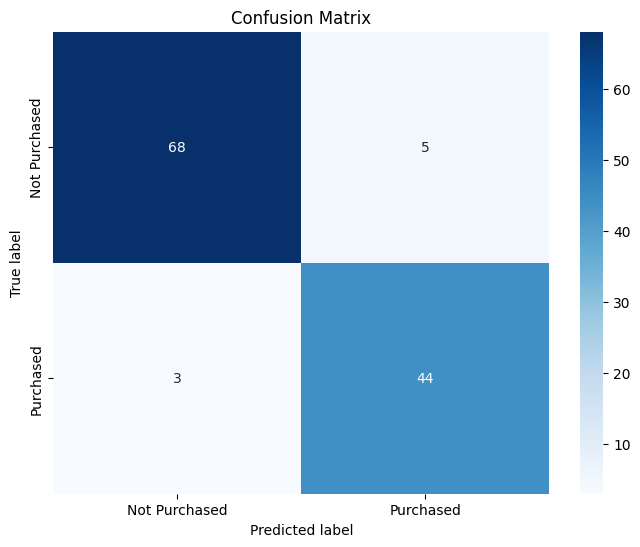

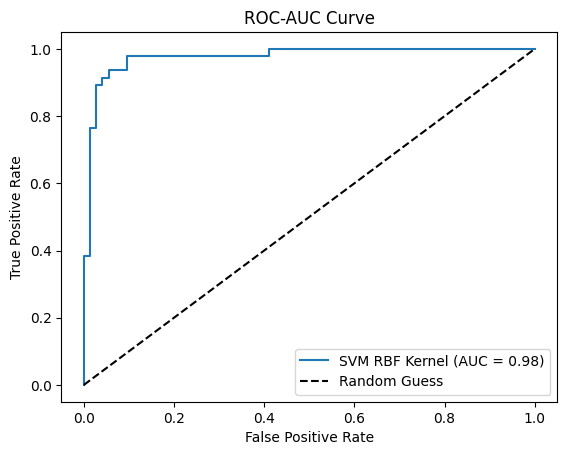

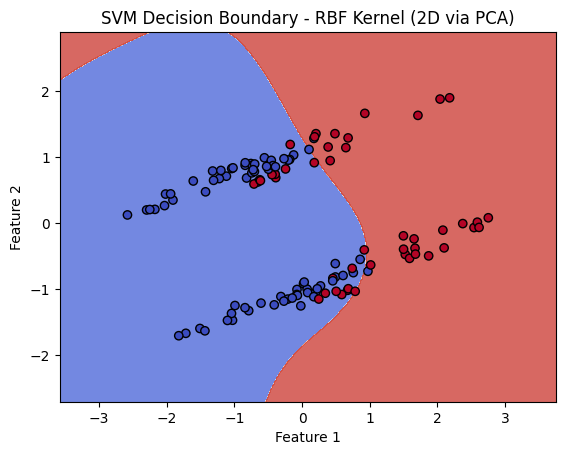

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'Social_Network_Ads.csv'  # Replace with actual path
df = pd.read_csv(file_path)

# Step 1: Drop the 'User ID' column
df_clean = df.drop(columns=['User ID'])

# Step 2: Convert 'Gender' column to numerical (Male = 1, Female = 0)
le = LabelEncoder()
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])

# Step 3: Display the cleaned dataset
print("Cleaned Dataset:")
print(df_clean.head())  # Display first few rows of the cleaned dataset

# Step 4: Split data into features (Gender, Age, EstimatedSalary) and target (Purchased)
X = df_clean[['Gender', 'Age', 'EstimatedSalary']]
y = df_clean['Purchased']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # F1-Score
    f1 = f1_score(y_true, y_pred)

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:\n", class_report)

    return f1

# Step 8: Evaluate SVM using F1-Measure
f1_rbf = classification_metrics(y_test, y_pred_rbf, "SVM with RBF Kernel")

# Step 9: Output predictions for each user in the test set
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'Gender': df_clean.iloc[y_test.index]['Gender'].map({1: 'Male', 0: 'Female'}),  # Retrieve original Gender
    'Age': X_test[:, 1],  # Standardized Age
    'EstimatedSalary': X_test[:, 2],  # Standardized EstimatedSalary
    'Actual Purchased': y_test,
    'Predicted Purchased': y_pred_rbf
})

print(test_results.head())  # Display first few rows of the prediction results

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)
plot_confusion_matrix(cm, ['Not Purchased', 'Purchased'])

# Optional: Plot ROC-AUC curve
def plot_roc_auc(svm_model, X_test, y_test, model_name):
    y_prob = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend()
    plt.show()

# Plot ROC curve for the RBF kernel SVM
plot_roc_auc(svm_rbf, X_test, y_test, "SVM RBF Kernel")

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_rbf_2d = SVC(kernel='rbf', random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_rbf_2d, X_test_2d, y_test, "RBF Kernel (2D via PCA)")

23.	A social network dataset is a categorical dataset to determine whether a user purchased a particular product based on gender, age and estimated salary.

Objectives:

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to classify whether a user purchased a car or not? (Use RBF Kernel)

iii.	Create a confusion matrix and evaluate the model using accuracy

Cleaned Dataset:
   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

--- SVM with RBF Kernel ---
Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.90      0.94      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120


Predictions on Test Set:
     Gender       Age  EstimatedSalary  Actual Purchased  Predicted Purchased
209  Female  0.827784        -1.433827                 0                    1
280  Female  2.105076         0.513775                 1                    1
33   Female -0.940775        -0.784626                 0             

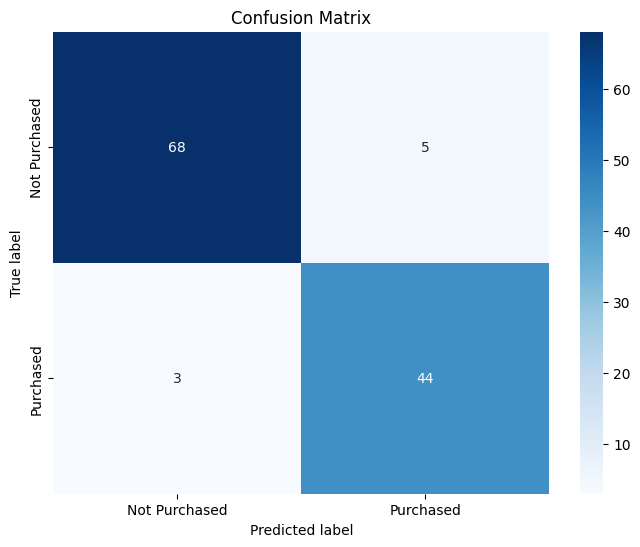

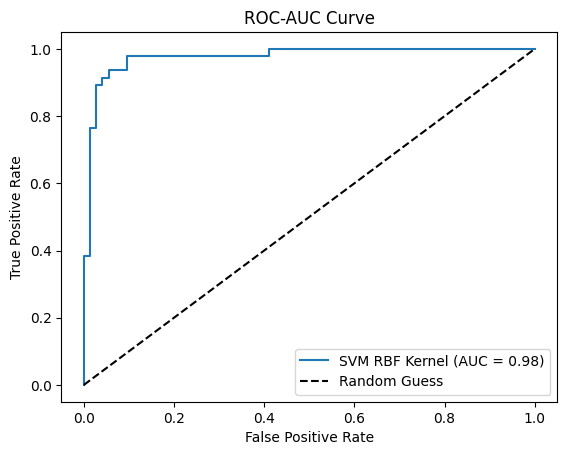

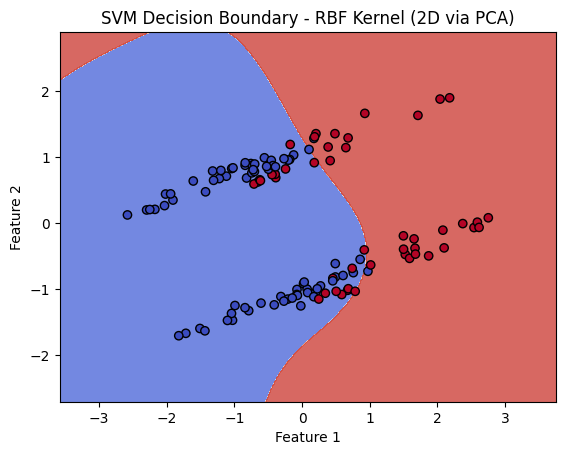

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'Social_Network_Ads.csv'  # Replace with actual path
df = pd.read_csv(file_path)

# Step 1: Drop the 'User ID' column
df_clean = df.drop(columns=['User ID'])

# Step 2: Convert 'Gender' column to numerical (Male = 1, Female = 0)
le = LabelEncoder()
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])

# Step 3: Display the cleaned dataset
print("Cleaned Dataset:")
print(df_clean.head())  # Display first few rows of the cleaned dataset

# Step 4: Split data into features (Gender, Age, EstimatedSalary) and target (Purchased)
X = df_clean[['Gender', 'Age', 'EstimatedSalary']]
y = df_clean['Purchased']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:\n", class_report)

    return accuracy

# Step 8: Evaluate SVM using Accuracy
accuracy_rbf = classification_metrics(y_test, y_pred_rbf, "SVM with RBF Kernel")

# Step 9: Output predictions for each user in the test set
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'Gender': df_clean.iloc[y_test.index]['Gender'].map({1: 'Male', 0: 'Female'}),  # Retrieve original Gender
    'Age': X_test[:, 1],  # Standardized Age
    'EstimatedSalary': X_test[:, 2],  # Standardized EstimatedSalary
    'Actual Purchased': y_test,
    'Predicted Purchased': y_pred_rbf
})

print(test_results.head())  # Display first few rows of the prediction results

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)
plot_confusion_matrix(cm, ['Not Purchased', 'Purchased'])

# Optional: Plot ROC-AUC curve
def plot_roc_auc(svm_model, X_test, y_test, model_name):
    y_prob = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend()
    plt.show()

# Plot ROC curve for the RBF kernel SVM
plot_roc_auc(svm_rbf, X_test, y_test, "SVM RBF Kernel")

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_rbf_2d = SVC(kernel='rbf', random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_rbf_2d, X_test_2d, y_test, "RBF Kernel (2D via PCA)")

24.	A social network dataset is a categorical dataset to determine whether a user purchased a particular product based on gender, age and estimated salary.

Objectives:

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to classify whether a user purchased a car or not? (Use RBF Kernel)

iii.	Create a confusion matrix and evaluate the model using Recall.



Cleaned Dataset:
   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

--- SVM with RBF Kernel ---
Recall: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.90      0.94      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120


Predictions on Test Set:
     Gender       Age  EstimatedSalary  Actual Purchased  Predicted Purchased
209  Female  0.827784        -1.433827                 0                    1
280  Female  2.105076         0.513775                 1                    1
33   Female -0.940775        -0.784626                 0               

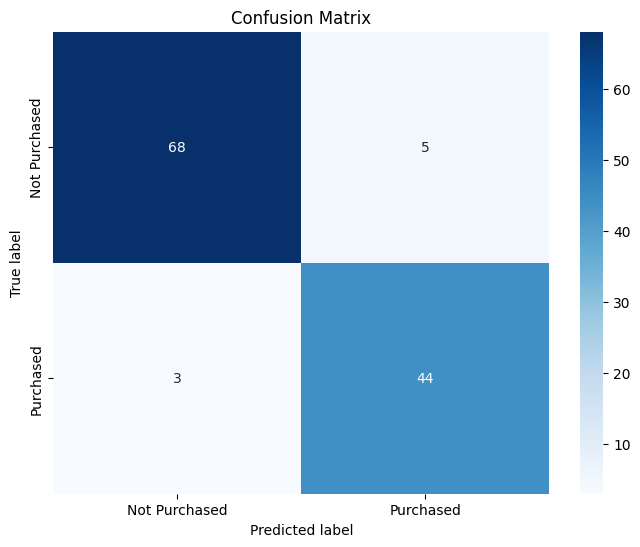

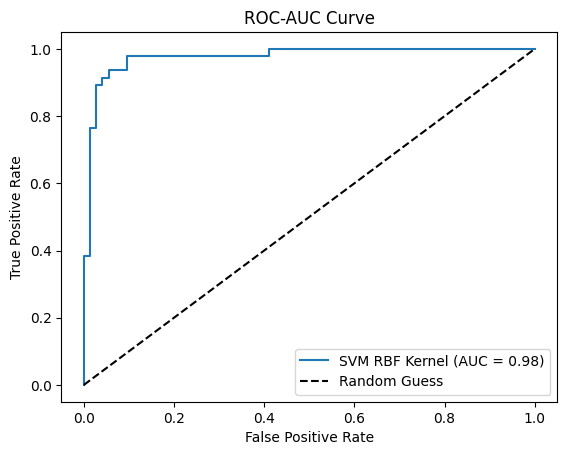

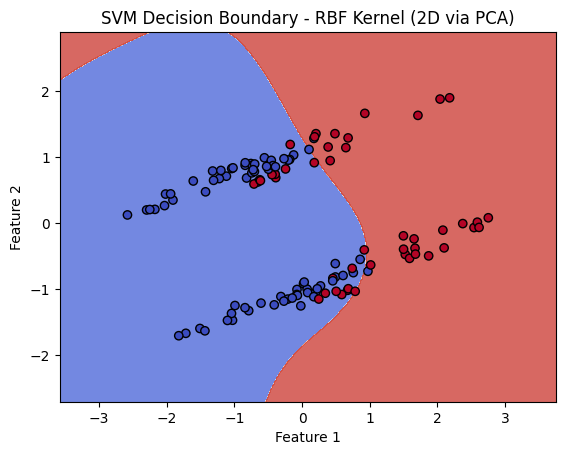

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import recall_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'Social_Network_Ads.csv'  # Replace with actual path
df = pd.read_csv(file_path)

# Step 1: Drop the 'User ID' column
df_clean = df.drop(columns=['User ID'])

# Step 2: Convert 'Gender' column to numerical (Male = 1, Female = 0)
le = LabelEncoder()
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])

# Step 3: Display the cleaned dataset
print("Cleaned Dataset:")
print(df_clean.head())  # Display first few rows of the cleaned dataset

# Step 4: Split data into features (Gender, Age, EstimatedSalary) and target (Purchased)
X = df_clean[['Gender', 'Age', 'EstimatedSalary']]
y = df_clean['Purchased']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # Recall
    recall = recall_score(y_true, y_pred)

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Recall: {recall:.2f}")
    print("\nClassification Report:\n", class_report)

    return recall

# Step 8: Evaluate SVM using Recall
recall_rbf = classification_metrics(y_test, y_pred_rbf, "SVM with RBF Kernel")

# Step 9: Output predictions for each user in the test set
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'Gender': df_clean.iloc[y_test.index]['Gender'].map({1: 'Male', 0: 'Female'}),  # Retrieve original Gender
    'Age': X_test[:, 1],  # Standardized Age
    'EstimatedSalary': X_test[:, 2],  # Standardized EstimatedSalary
    'Actual Purchased': y_test,
    'Predicted Purchased': y_pred_rbf
})

print(test_results.head())  # Display first few rows of the prediction results

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)
plot_confusion_matrix(cm, ['Not Purchased', 'Purchased'])

# Optional: Plot ROC-AUC curve
def plot_roc_auc(svm_model, X_test, y_test, model_name):
    y_prob = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend()
    plt.show()

# Plot ROC curve for the RBF kernel SVM
plot_roc_auc(svm_rbf, X_test, y_test, "SVM RBF Kernel")

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_rbf_2d = SVC(kernel='rbf', random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_rbf_2d, X_test_2d, y_test, "RBF Kernel (2D via PCA)")

25.	A social network dataset is a categorical dataset to determine whether a user purchased a particular product based on gender, age and estimated salary.

Objectives:

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to classify whether a user purchased a car or not? (Use RBF Kernel)

iii.	Create a confusion matrix and evaluate the model using Precision


Cleaned Dataset:
   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

--- SVM with RBF Kernel ---
Precision: 0.90

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.90      0.94      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120


Predictions on Test Set:
     Gender       Age  EstimatedSalary  Actual Purchased  Predicted Purchased
209  Female  0.827784        -1.433827                 0                    1
280  Female  2.105076         0.513775                 1                    1
33   Female -0.940775        -0.784626                 0            

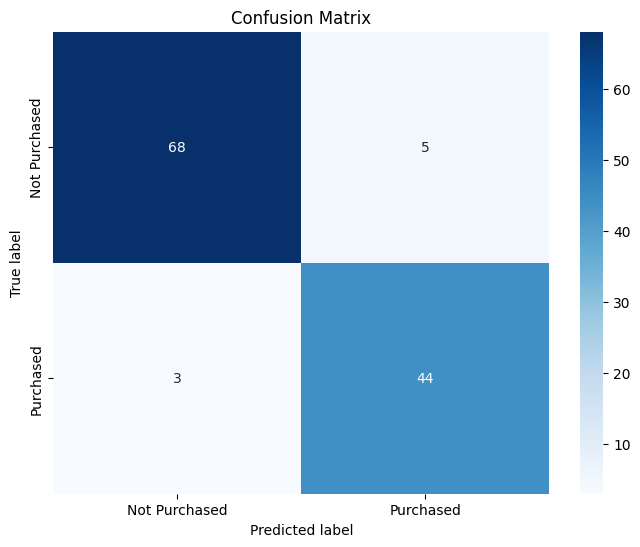

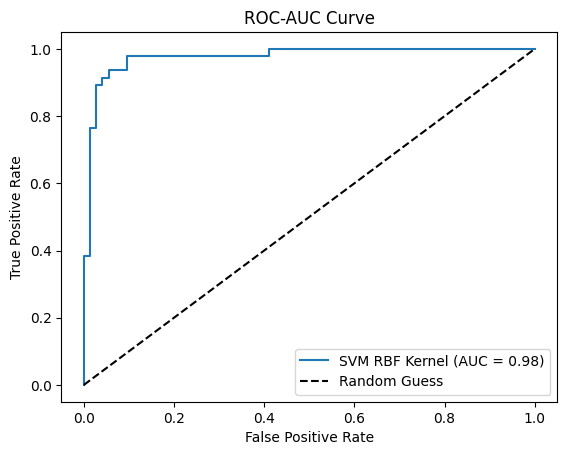

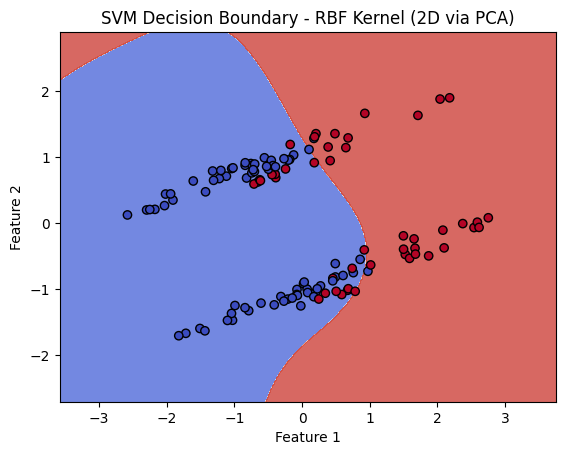

In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import precision_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'Social_Network_Ads.csv'  # Replace with actual path
df = pd.read_csv(file_path)

# Step 1: Drop the 'User ID' column
df_clean = df.drop(columns=['User ID'])

# Step 2: Convert 'Gender' column to numerical (Male = 1, Female = 0)
le = LabelEncoder()
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])

# Step 3: Display the cleaned dataset
print("Cleaned Dataset:")
print(df_clean.head())  # Display first few rows of the cleaned dataset

# Step 4: Split data into features (Gender, Age, EstimatedSalary) and target (Purchased)
X = df_clean[['Gender', 'Age', 'EstimatedSalary']]
y = df_clean['Purchased']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # Precision
    precision = precision_score(y_true, y_pred)

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Precision: {precision:.2f}")
    print("\nClassification Report:\n", class_report)

    return precision

# Step 8: Evaluate SVM using Precision
precision_rbf = classification_metrics(y_test, y_pred_rbf, "SVM with RBF Kernel")

# Step 9: Output predictions for each user in the test set
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'Gender': df_clean.iloc[y_test.index]['Gender'].map({1: 'Male', 0: 'Female'}),  # Retrieve original Gender
    'Age': X_test[:, 1],  # Standardized Age
    'EstimatedSalary': X_test[:, 2],  # Standardized EstimatedSalary
    'Actual Purchased': y_test,
    'Predicted Purchased': y_pred_rbf
})

print(test_results.head())  # Display first few rows of the prediction results

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)
plot_confusion_matrix(cm, ['Not Purchased', 'Purchased'])

# Optional: Plot ROC-AUC curve
def plot_roc_auc(svm_model, X_test, y_test, model_name):
    y_prob = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend()
    plt.show()

# Plot ROC curve for the RBF kernel SVM
plot_roc_auc(svm_rbf, X_test, y_test, "SVM RBF Kernel")

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_rbf_2d = SVC(kernel='rbf', random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_rbf_2d, X_test_2d, y_test, "RBF Kernel (2D via PCA)")

26.	A social network dataset is a categorical dataset to determine whether a user purchased a particular product based on gender, age and estimated salary.

Objectives:

i.	Understand the Dataset & cleanup (if required).

ii.	Use a SVM to classify whether a user purchased a car or not? (Use RBF Kernel)

iii.	Create a confusion matrix and evaluate the model using F1-Measure



Cleaned Dataset:
   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

--- SVM with RBF Kernel ---
F1-Score: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.90      0.94      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120


Predictions on Test Set:
     Gender       Age  EstimatedSalary  Actual Purchased  Predicted Purchased
209  Female  0.827784        -1.433827                 0                    1
280  Female  2.105076         0.513775                 1                    1
33   Female -0.940775        -0.784626                 0             

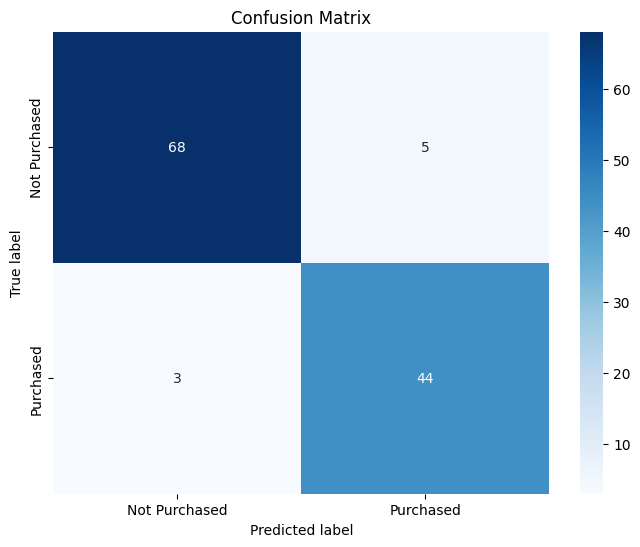

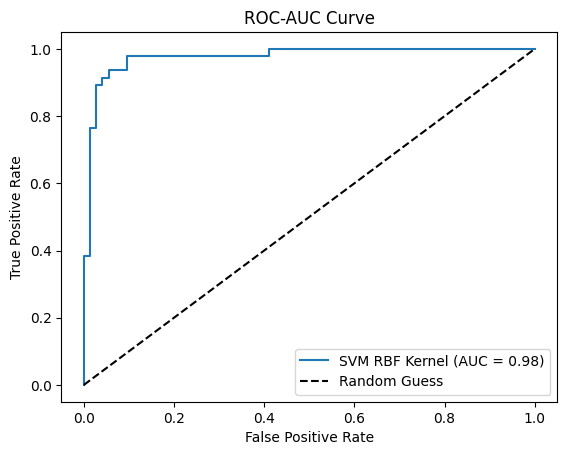

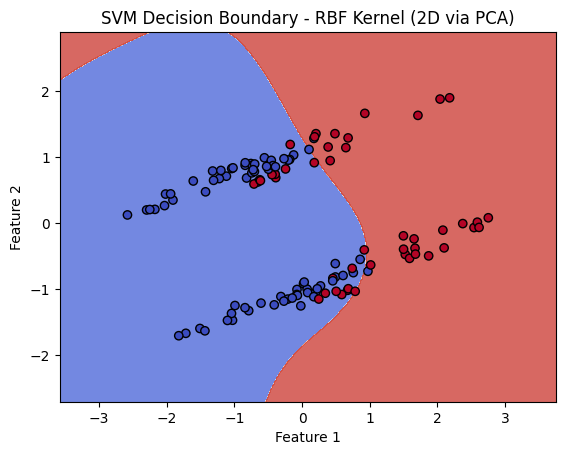

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import f1_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'Social_Network_Ads.csv'  # Replace with actual path
df = pd.read_csv(file_path)

# Step 1: Drop the 'User ID' column
df_clean = df.drop(columns=['User ID'])

# Step 2: Convert 'Gender' column to numerical (Male = 1, Female = 0)
le = LabelEncoder()
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])

# Step 3: Display the cleaned dataset
print("Cleaned Dataset:")
print(df_clean.head())  # Display first few rows of the cleaned dataset

# Step 4: Split data into features (Gender, Age, EstimatedSalary) and target (Purchased)
X = df_clean[['Gender', 'Age', 'EstimatedSalary']]
y = df_clean['Purchased']

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Classification metrics function
def classification_metrics(y_true, y_pred, model_name):
    # F1-Score
    f1 = f1_score(y_true, y_pred)

    # Classification report (includes precision, recall, f1-score)
    class_report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:\n", class_report)

    return f1

# Step 8: Evaluate SVM using F1-Measure
f1_rbf = classification_metrics(y_test, y_pred_rbf, "SVM with RBF Kernel")

# Step 9: Output predictions for each user in the test set
print("\nPredictions on Test Set:")
test_results = pd.DataFrame({
    'Gender': df_clean.iloc[y_test.index]['Gender'].map({1: 'Male', 0: 'Female'}),  # Retrieve original Gender
    'Age': X_test[:, 1],  # Standardized Age
    'EstimatedSalary': X_test[:, 2],  # Standardized EstimatedSalary
    'Actual Purchased': y_test,
    'Predicted Purchased': y_pred_rbf
})

print(test_results.head())  # Display first few rows of the prediction results

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)
plot_confusion_matrix(cm, ['Not Purchased', 'Purchased'])

# Optional: Plot ROC-AUC curve
def plot_roc_auc(svm_model, X_test, y_test, model_name):
    y_prob = svm_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC Curve')
    plt.legend()
    plt.show()

# Plot ROC curve for the RBF kernel SVM
plot_roc_auc(svm_rbf, X_test, y_test, "SVM RBF Kernel")

# Optional: Visualize decision boundaries (if reducing to 2D via PCA)
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train SVM on 2D data for decision boundary visualization
svm_rbf_2d = SVC(kernel='rbf', random_state=42)
svm_rbf_2d.fit(X_train_2d, y_train)

# Visualize decision boundaries
def plot_decision_boundary(clf, X, y, model_name):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Decision Boundary - {model_name}')
    plt.show()

# Uncomment to visualize decision boundaries (for 2D data only)
plot_decision_boundary(svm_rbf_2d, X_test_2d, y_test, "RBF Kernel (2D via PCA)")